# 데이터 확인

In [267]:
# 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [232]:
# 데이터 
data_path = '/content/drive/MyDrive/cloud_ai/2차_실기평가/2차_모듈/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [233]:
train.head().T
# gender = Male / Female => 명목형 / 문자 => 수치로?
# age = 수치형
# hypertension = 0 / 1 => 0은 무, 1은 유 
# heart_disease = 0 / 1 => 0은 무, 1은 유 
# ever_married = Yes / No => 0은 Y,1은 N
# work_type = 'Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'
# Residence_type = Urban, Rural
# avg_glucose_level = 수치형
# bmi = 수치형
# smoking_status = 'never smoked', 'formerly smoked', 'Unknown', 'smokes'
# stroke = 0 / 1 => 0은 무, 1은 유 
# 수치형 = age, avg_glucose_level, bmi / 범주형 = gender, hypertension, heart_disease, work_type, Residence_level, smoking_status, stroke 예상됨

id,0,1,2,3,4
gender,Male,Male,Female,Male,Female
age,28.0,33.0,42.0,56.0,24.0
hypertension,0,0,0,0,0
heart_disease,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,No
work_type,Private,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,79.53,78.44,103.0,64.87,73.36
bmi,31.1,23.9,40.3,28.8,28.8
smoking_status,never smoked,formerly smoked,Unknown,never smoked,never smoked


In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


In [235]:
train.shape, test.shape, submission.shape

((15304, 11), (10204, 10), (10204, 1))

In [236]:
test.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown


In [237]:
submission.head(5)

,stroke
id,
15304,0.041296
15305,0.041296
15306,0.041296
15307,0.041296
15308,0.041296


In [238]:
train.smoking_status.unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [239]:
train.columns, test.columns, submission.columns
# 정답은 stroke / test.id = submission.id / submission.stroke의 값은 모두 0.41296으로 동일함

(Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status', 'stroke'],
       dtype='object'),
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
        'smoking_status'],
       dtype='object'),
 Index(['stroke'], dtype='object'))

In [240]:
# 결측값 없음
train.isnull().sum().values, test.isnull().sum().values,submission.isnull().sum().values

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0]))

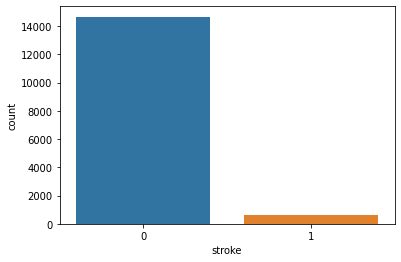

In [241]:
# 정답값 분포 확인

sns.countplot(data=train, x='stroke');

In [242]:
c0, c1 = np.unique( train.stroke.values, return_counts=True)[1]
c0 / c1 
# 0이 1보다 23.21518987341772배 많음 => 뇌졸중 환자보다 뇌졸중 환자가 아닌 사람이 23.21518987341772배 많음

23.21518987341772

타겟값간 비율 23.21518987341772


Text(0.5, 1.0, 'Stroke Value Distribution')

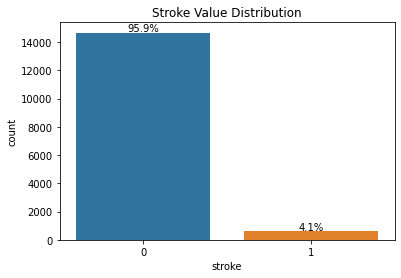

In [243]:
# 향후 시각화 자료에 비율을 표기하는 부분을 추가 => 텍스트 드로잉
def show_text_percent_by_stroke( ax, total_count, is_show=True,  ):
  '''
    is_show : True일때만 텍스트가 노출되게 처리
    ax : 텍스트를 그리고자 하는 차트의 축정보
    total_count : 전체 카운트수
  '''
  persents = list()         # 비율을 담는 그릇
  # 카운트 플롯 차트상에 개별 박스 정보를 구하는 방법 -> ax.patches

  # 카운트 플롯 차트상에서 순차적으로 박스를 하나씩 추출한다
  for patch in ax.patches: # 차트상에 존재하는 모든 형태의 도형을 차례대로 추출하는 연속형 변수
    w = patch.get_width()  # 타겟값 0 혹은 1, 카운트 플롯의 개별 박스 너비
    h = patch.get_height() # 타겟값 0 혹은 1의 카운트수 -> 카운트 플롯의 개별 박스 높이->카운트
    p = h/total_count * 100 # 타깃값의 비율 = (개별박스의 높이(카운트) / 전체카운트)*100
    persents.append( p )
    # 텍스트 그리기
    # 좌표 정보 획득
    l = patch.get_x()    # 도형 왼쪽 테투리 X축의 기준 위치값    
    ax.text(  x=l + w/2,  # 도형의 정 가운데를 X축 좌표
              y=h + total_count*0.005, # 1, total_count(가변값)의 특정 비율로 올려서 위치를 조정
              s=f'{p:1.1f}%', # 타겟값의 비율을 개별 차트내 도형 위에 그려지는 내용 ex) 38.8% /  현 차트 내에 69.4%, 30.6% 임
              ha='center'    # 정렬(가운데)
            )
  if is_show:
    if len(persents) == 2: # 타겟용
      print( '타겟값간 비율', persents[0]/persents[1] )
    elif len(persents) == 4: # 이진 피처용
      # print(persents)
      # 타겟값에 맞춰서 도형이 그려진다 0번 타겟이 먼저 그려지고, 1번 타겟이 나중에 그려진다
      print( persents[0]/persents[2], persents[1]/persents[3] )
  pass

ax = sns.countplot( data=train, x='stroke');
show_text_percent_by_stroke( ax, train.shape[0] )
ax.set_title('Stroke Value Distribution')

# 데이터 분석

In [268]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
cat_cols = ['gender', 'hypertension','heart_disease', 'Residence_type', 'work_type', 'smoking_status']
cat_cols_v1 = ['gender', 'hypertension','heart_disease', 'Residence_type', 'ever_married']
cat_cols_v2 = ['work_type', 'smoking_status']

## 수치형

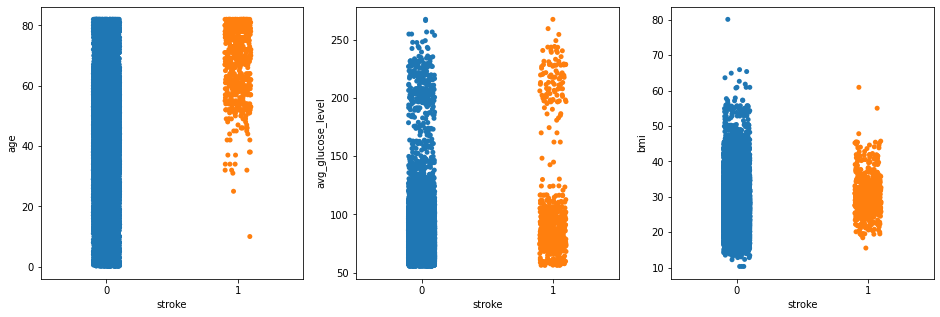

In [269]:
# 수치형 
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=train, x='stroke', y='age' )
plt.subplot(1, 3,2)
sns.stripplot(data=train, x='stroke', y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.stripplot(data=train, x='stroke', y='bmi')
# 나이 :뇌졸중 환자 중  40~60대 많음
# 평균 당수치 : 뇌졸중 환자 중 당 수치가 높은 사람보다 낮은 사람이 많다 => 당수치와의 상관관계는 적은 것으로 예상됨
# bmi : 뇌졸중 환자의 bmi 수치는 약 20 ~ 40 이 많음

## 명목형

- gender = Male / Female => 명목형 / 문자
- hypertension = 0 / 1 => 0은 무, 1은 유 
- heart_disease = 0 / 1 => 0은 무, 1은 유 
- work_type = 'Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'
- Residence_type = Urban, Rural
- smoking_status = 'never smoked', 'formerly smoked', 'Unknown', 'smokes'



- 이진형
  - gender
  - hypertension
  - heart_disease
  - Residence_type
  - ever_married
- 고유값 2개 초과
  - work_type
  - smoking_status

In [246]:
# 고혈압 발병 vs 미발병
train['hypertension'].value_counts()

0    14543
1      761
Name: hypertension, dtype: int64

In [247]:
# 심장질환 발병 vs 미발병
train['heart_disease'].value_counts()

0    14947
1      357
Name: heart_disease, dtype: int64

In [248]:
# 남 vs 여
train['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [249]:
# 도시 vs 시골
train['Residence_type'].value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [270]:
train['ever_married'].value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

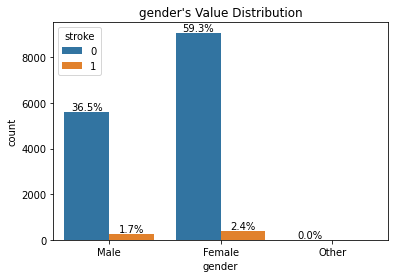

27.855158730158724 4.945312500000001


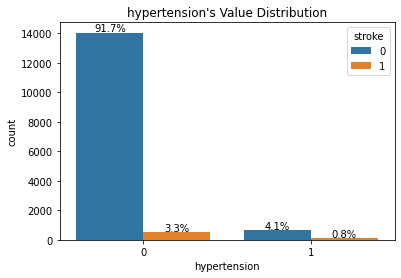

25.40812720848057 4.409090909090908


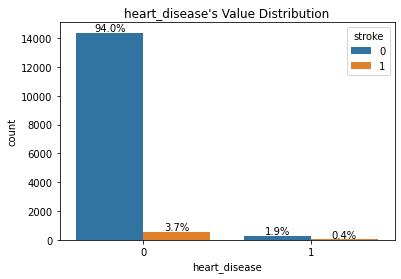

23.253968253968253 23.176656151419557


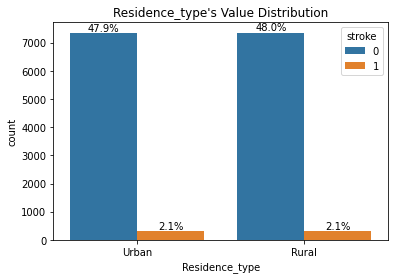

16.57191201353638 118.97560975609757


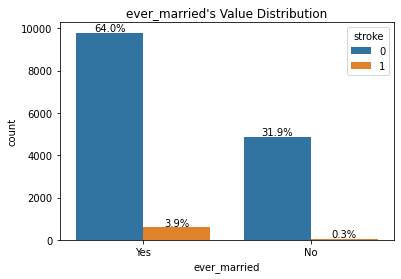

In [271]:
# 이진형
# cat_cols_v1 = ['gender', 'hypertension','heart_disease', 'Residence_type', 'ever_married' ] 의 뇌졸중 발병 간의 상관관계
for cat_col_v1 in cat_cols_v1:
  ax = sns.countplot( data=train, x=cat_col_v1, hue='stroke');
  show_text_percent_by_stroke( ax, train.shape[0] )
  ax.set_title(f'{cat_col_v1}\'s Value Distribution')
  plt.show()
# 데이터의 대상의 성별이 남자보다 여자가 많음
# 성별 : 남자의 발병률보다 여자의 발병률이 높음
# 고혈압 : 뇌졸중 환자 중 고혈압 환자의 비율은 낮음 
# 심장질환 : 뇌졸중 환자 중 심장질환 환자의 비율은 낮음
# 거주지역 : 도시, 시골 비율 거의 동일함 => 해당 부분으로는 변별력이 없을 것이라고 예상됨 
# 결혼 : 결혼한 사람들의 비율이 높으며 뇌졸중 환자 중 기혼의 비율이 높음 

In [251]:
# cat_cols_v2 = ['work_type', 'smoking_status'] 교차분석표
def make_cross_tab(df, id ):
  cross_tab = pd.crosstab( df[id], df['stroke'], normalize='index' ) *100
  cross_tab.reset_index(inplace=True)
  return cross_tab

cross_tab_v1 = make_cross_tab(train, 'work_type') 
cross_tab_v1

stroke,work_type,0,1
0,Govt_job,95.499022,4.500978
1,Never_worked,100.000000,0.000000
2,Private,95.857260,4.142740
3,Self-employed,91.851470,8.148530
4,children,99.950932,0.049068


In [252]:
cross_tab_v2 = make_cross_tab(train, 'smoking_status')
cross_tab_v2

stroke,smoking_status,0,1
0,Unknown,97.622716,2.377284
1,formerly smoked,93.196406,6.803594
2,never smoked,95.908295,4.091705
3,smokes,94.960336,5.039664


In [253]:
def show_pointplot(id,cross_tab, color, ax=None):
  if ax:
    sns.pointplot( x= id ,            # 피처값
                  y= 1,            # 정답 1에 대한 포인트 플롯
                  data=cross_tab,  # 그리는 대상 df 
                  order= cross_tab[id],          # 포인트 플롯 순서 
                  color=color,     # 그리는 색상
                  ax=ax
                  );
show_pointplot_v1 = show_pointplot('work_type', cross_tab_v1, 'blue')
show_pointplot_v2 = show_pointplot('smoking_status', cross_tab_v2, 'blue')
# nom_0에 설정된 사용하는 고유값 별로 1의 비율이 다르다 -> 구분된다 -> 학습에 도움된다 

0.723292469352014 1.0905272981801213


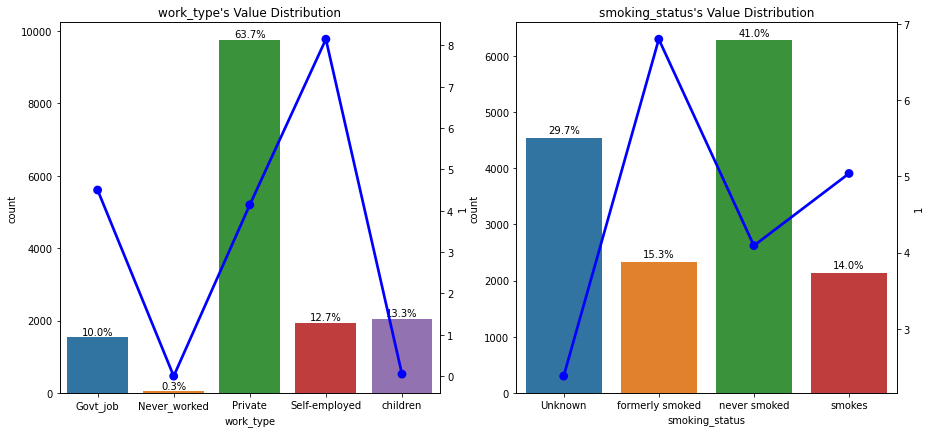

In [254]:
# cat_cols_v2 = ['work_type', 'smoking_status']

def show_count_point_plot( all_data, features, rows=2, cols=2): 
  # 1개의 차트에 격자로 분할 -> 각 자리에 ax를 전달 -> 이것을 이용하여 그린다 
  plt.figure( figsize=(15,15) ) # 그리면서 조정 : 세로 3칸, 가로 2칸
  # 서브플롯 배치 
  p_grid = gridspec.GridSpec(rows, cols) # 3줄, 2칸 => 차트 5개 ;=> 피처가 5개

  for idx, feature in enumerate( features ):
    ax = plt.subplot(p_grid[idx])
    cross_tab = make_cross_tab(all_data, feature )
      # order를 사용했으면 한 차트에 사용되는 모든 함수는 같은 순서(order) 유지해야 동일하게 배치됨(그렇지 않으면 배치가 달라질 수 있다)
    sns.countplot( data=all_data, x=feature, ax=ax, order=cross_tab[feature] ) # ax=ax : 격자 안에서 특정 위치로 차트가 세팅
    show_text_percent_by_stroke( ax, all_data.shape[0] )
    ax.set_title(f'{feature}\'s Value Distribution')

    
    show_pointplot(feature, cross_tab, 'blue', ax.twinx())

  plt.show()

show_count_point_plot( train, cat_cols_v2)
# 업무 : 총 데이터의 직업 중 가장 많은 비중을 차지하고 있는 직업은 Private work_type이나 뇌졸중 환자가 가장 많은 직업은 Self-employed
#              => 발병 순위는 Self-employed - Govt_job - Private_work_type - Never_worked - children 
# 흡연 : 총 데이터 중 담배를 전혀 피지 않았던 사람의 비율이 높음. 뇌졸중 환자가 가장 많은 흡연 상태는 전에 폈음의 비율이 가장 높다 
#        => 발병 순위는 fermerly smoked - smokes - never smoked - Unknown

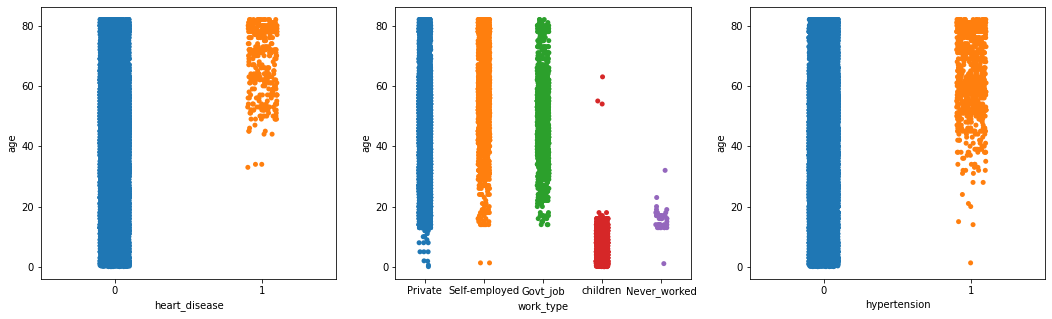

In [257]:
# 나이와 심장 질환, 나이와 업무형태, 나이와 고혈압 확인
plt.figure(figsize=(18, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=train,x='heart_disease',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=train,x='work_type',y='age')
plt.subplot(1, 3,3)
sns.stripplot(data=train,x='hypertension',y='age')
# 심장질환 및 고혈압 환자는 40대 ~ 로 확인됨, 고령 환자가 많음 

# 피처 엔지니어링

## 이진형 데이터 중 문자열로 되어 있는 데이터 수치형으로 변환

In [297]:
# 문자형을 숫자형으로 변환

enc_col = ["gender", "work_type",'ever_married',"Residence_type","smoking_status"]
ord_enc = OrdinalEncoder()
train[enc_col] = ord_enc.fit_transform( train[enc_col] )
test[enc_col] = ord_enc.fit_transform( test[enc_col] )

In [298]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  float64
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  float64
 5   work_type          15304 non-null  float64
 6   Residence_type     15304 non-null  float64
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  float64
 10  stroke             15304 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.9 MB


In [299]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10204 entries, 15304 to 25507
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             10204 non-null  float64
 1   age                10204 non-null  float64
 2   hypertension       10204 non-null  int64  
 3   heart_disease      10204 non-null  int64  
 4   ever_married       10204 non-null  float64
 5   work_type          10204 non-null  float64
 6   Residence_type     10204 non-null  float64
 7   avg_glucose_level  10204 non-null  float64
 8   bmi                10204 non-null  float64
 9   smoking_status     10204 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 876.9 KB


In [279]:
# 상관관계 확인
corr_values = train.corr()
corr_values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.033210,0.005353,0.061724,-0.039942,0.057705,-0.002931,0.035575,-0.015637,-0.073932,0.014889
age,-0.033210,1.000000,0.232629,0.193394,0.716964,-0.388088,0.013268,0.108897,0.390721,0.285806,0.261320
hypertension,0.005353,0.232629,1.000000,0.074178,0.128471,-0.044366,0.002463,0.122834,0.106665,0.083064,0.145895
heart_disease,0.061724,0.193394,0.074178,1.000000,0.088752,-0.017436,0.007602,0.137147,0.054583,0.025643,0.111518
ever_married,-0.039942,0.716964,0.128471,0.088752,1.000000,-0.398727,0.005217,0.062988,0.394671,0.291338,0.114010
work_type,0.057705,-0.388088,-0.044366,-0.017436,-0.398727,1.000000,-0.012797,-0.009094,-0.347580,-0.341366,-0.031777
Residence_type,-0.002931,0.013268,0.002463,0.007602,0.005217,-0.012797,1.000000,-0.015051,0.003404,0.009754,-0.000331
avg_glucose_level,0.035575,0.108897,0.122834,0.137147,0.062988,-0.009094,-0.015051,1.000000,0.108142,0.024990,0.149273
bmi,-0.015637,0.390721,0.106665,0.054583,0.394671,-0.347580,0.003404,0.108142,1.000000,0.253907,0.065393
smoking_status,-0.073932,0.285806,0.083064,0.025643,0.291338,-0.341366,0.009754,0.024990,0.253907,1.000000,0.036189


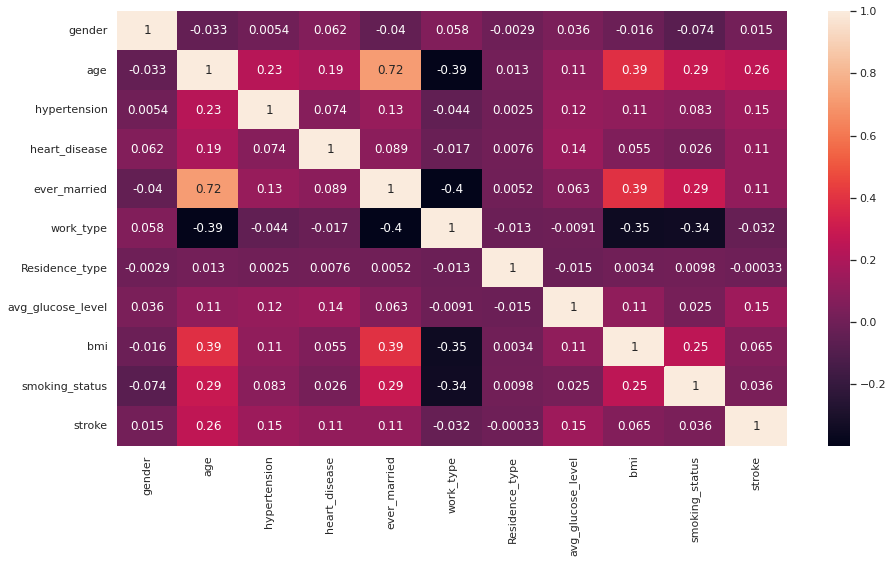

In [288]:
# 히트맵
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_values, annot=True)

## 인코딩

- 고유값 6개 미만은 원-핫 인코딩 진행

In [301]:
cat_one_hot_feats = cat_cols
print(cat_one_hot_feats)

enc_cat_train = OneHotEncoder().fit_transform( train[cat_one_hot_feats] )
enc_cat_test = OneHotEncoder().fit_transform( test[cat_one_hot_feats] )
enc_cat_train, enc_cat_test

['gender', 'hypertension', 'heart_disease', 'Residence_type', 'work_type', 'smoking_status']


(<15304x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 91824 stored elements in Compressed Sparse Row format>,
 <10204x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 61224 stored elements in Compressed Sparse Row format>)

In [302]:
# 데이터 분리
X=train.drop(['stroke'],axis=1)
y=train['stroke']

X.shape, y.shape

((15304, 10), (15304,))

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11478, 10), (3826, 10), (11478,), (3826,))

In [304]:
# 값의 범위 
minmax = MinMaxScaler()
X_train_scaled = pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.267578,0.0,0.0,0.0,0.5,0.0,0.005933,0.319484,1.000000
1,0.0,0.218750,0.0,0.0,0.0,0.5,0.0,0.056408,0.207736,0.333333
2,0.0,0.328613,0.0,0.0,1.0,0.5,1.0,0.261230,0.183381,0.666667
3,0.0,0.414062,0.0,0.0,1.0,0.5,1.0,0.119362,0.378223,1.000000
4,0.5,0.304199,0.0,0.0,1.0,0.5,0.0,0.239476,0.244986,0.000000
...,...,...,...,...,...,...,...,...,...,...
11473,0.0,0.536133,0.0,0.0,1.0,0.5,1.0,0.182833,0.184814,0.666667
11474,0.0,0.218750,0.0,0.0,0.0,0.5,0.0,0.183727,0.206304,0.000000
11475,0.0,0.291992,0.0,0.0,0.0,0.5,0.0,0.216970,0.252149,0.000000
11476,0.5,0.645996,0.0,0.0,1.0,0.0,1.0,0.134523,0.197708,0.000000
